In [154]:
import pandas as pd

# Getting to Know 'the structure' of a data


In [155]:
iris_data = pd.read_csv('./data/iris.csv', index_col='Id') # Numerical dataset
mushroom_data = pd.read_csv('./data/mushrooms.csv') # Categorical dataset

mushroom_data.info() # shows each columns informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Getting to know 'the values' of a dataset
### Categorical Values

In [156]:
#Getting to know 'the values' of a dataset

mushroom_data.describe() # depends on data types. the table below shows information about categorical values

# Unique = the catergories of Values in a column

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [157]:
mushroom_data['class'].unique() # describes the uniques of 'class'


array(['p', 'e'], dtype=object)

### value_counts로 비율을 구할 수 있음.

In [158]:
# Total numbers of each unique in 'class'
a = mushroom_data['class'].value_counts()
print(a)
print('')
# Proportion of uniques in 'class'
b = mushroom_data['class'].value_counts(normalize=True)
print(b)

e    4208
p    3916
Name: class, dtype: int64

e    0.517971
p    0.482029
Name: class, dtype: float64


<AxesSubplot:>

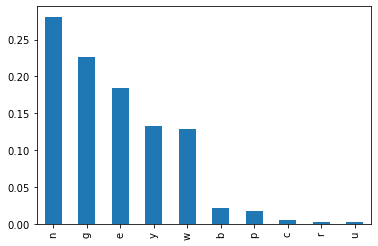

In [159]:
# Value_counts is also used to plot a bar-graph.
mushroom_data['cap-color'].value_counts(normalize=True).plot.bar()

### Numerical Value

<AxesSubplot:>

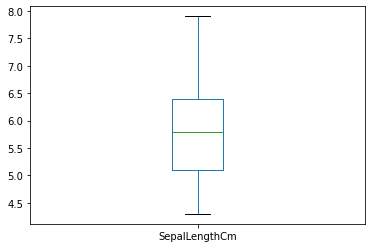

In [160]:
# Range of 'SppalLengthCm'
iris_data['SepalLengthCm'].plot.box()

<AxesSubplot:ylabel='Frequency'>

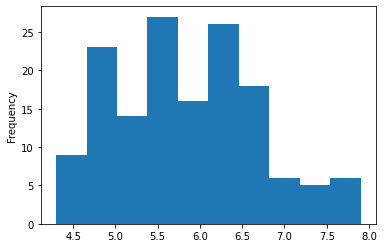

In [161]:
# Histogram is recommanded to plot numerical Value.
iris_data['SepalLengthCm'].plot.hist()

<AxesSubplot:xlabel='Id'>

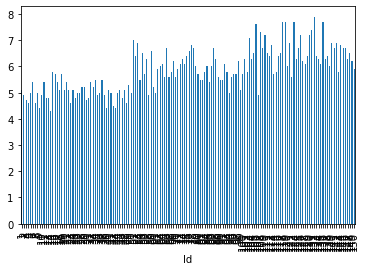

In [162]:
# bar chart is not recommended to plot numerical values.
iris_data['SepalLengthCm'].plot.bar()

<AxesSubplot:>

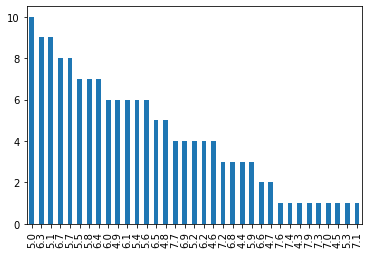

In [163]:
# if the widths of a bar can be modified to get between 2 and 10 bars, bar chart can be used for numerical values. 
# yet, I don't know how to set widths of a bar.
iris_data['SepalLengthCm'].value_counts().plot.bar()

### To apply a function to every values in a column

In [1]:
# It is recommended to combine apply with lambda.
# apply method will help to change every values in a column
iris_data['SepalLengthCm'].apply(lambda x : int(round(x,1)))

SyntaxError: invalid syntax (<ipython-input-1-2379359dc2c0>, line 3)

In [165]:
# a bracket is used to choose columns that you want to include.
iris_data[['SepalLengthCm','SepalWidthCm']]

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
...,...,...
146,6.7,3.0
147,6.3,2.5
148,6.5,3.0


### Groupby Method
1. is used to set multi-index
2. is recommended to select categorical values for milti-index 


In [172]:
mushroom_data.groupby(['class','cap-shape']).size()


class  cap-shape
e      b             404
       f            1596
       k             228
       s              32
       x            1948
p      b              48
       c               4
       f            1556
       k             600
       x            1708
dtype: int64

In [167]:
# value_count method is similar to gropuby, but it should be used only for one column.
k = mushroom_data['gill-color']
k.value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [173]:
# What is the most frequent unique of class at bruises, cap-shape, and cap-color index?
a = mushroom_data.groupby(['bruises','cap-shape','cap-color'])['class'].max()
print(a)


bruises  cap-shape  cap-color
f        b          g            e
                    n            p
                    w            e
                    y            p
         c          y            p
         f          c            p
                    e            p
                    g            p
                    n            p
                    r            e
                    u            e
                    w            e
                    y            p
         k          c            p
                    e            p
                    g            e
                    n            p
                    w            e
                    y            p
         s          g            e
                    n            e
         x          c            p
                    e            p
                    g            p
                    n            p
                    p            p
                    r            e
                    u    